<a href="https://colab.research.google.com/github/RainaVardhan/Data-Science-Systems-HW-Labs/blob/main/Project_CHD__finished_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 2: CHD**

**Summary:** For this project, we explored the following research question: What is the likelihood of a person developing coronary heart disease (CHD) given their heart rate and total cholesterol?  To conduct our analysis, we will build predictive algorithms from data given by the Framingham Heart Study using the variables totChol, heartRate, and TenYearCHD. totChol is a numeric variable that shows the respondent's total cholesterol in mg per dL. heartRate is a numeric variable that shows the respondent’s heart rate in beats per minute. Finally, TenYearCHD is a categorical variable that shows the ten-year risk of the respondent’s coronary heart disease, given as either 0 depicting that the respondent has no risk, and 1 depicting that the respondent is at risk. Our analytical approach to this project consisted of data wrangling, building models, and analysis. As part of the data wrangling stage, we ensured that our datasets, training_data, and testing_data, were clean and valid by dropping all the instances with missing or NaN values under each variable to maintain robustness in our predictive analysis. Next, in the model-building phase, we developed both decision tree and K-nearest neighbors (KNN) models to explore different aspects of the data. With decision trees, we can see how different factors like age, current smoker status, cigarettes smoked per day, total cholesterol, and systolic blood pressure interact to increase or decrease the risk of coronary heart disease, making it easy to predict whether someone is at risk of developing coronary heart disease. With KNN, we can see similarities between different instances in the dataset by measuring the closeness of specific cases to other cases which can be useful to see how similar health profiles often suggest a similar health outcome.


**Data:**

In [117]:
! git clone https://www.github.com/DS3001/project_chd

fatal: destination path 'project_chd' already exists and is not an empty directory.


In [118]:
import pandas as pd
import numpy as np


var_list = ['currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
output_filename = 'selected_chd_trainingdata_tree.csv'

df_train = pd.read_csv('/content/project_chd/fhs_train.csv', low_memory = False)
print(df_train.isna().sum())
df_train = df_train.dropna(subset = var_list)

df_train.head()

Unnamed: 0           0
sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay          24
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64


,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [119]:
print(df_train.isna().sum())

Unnamed: 0           0
sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay          24
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            283
TenYearCHD           0
dtype: int64


In [120]:
var_list = ['currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
output_filename = 'selected_chd_testingdata_tree.csv'

df_test = pd.read_csv('/content/project_chd/fhs_test.csv', low_memory = False)
print(df_test.isna().sum())
df_test = df_test.dropna(subset = var_list)

df_test.head()

Unnamed: 0           0
sex                  0
age                  0
education           20
currentSmoker        0
cigsPerDay           5
BPMeds              16
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             11
sysBP                0
diaBP                0
BMI                  4
heartRate            1
glucose            103
TenYearCHD           0
dtype: int64


,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,674,0,58,1.0,1,20.0,0.0,0,0,0,NaN,126.0,77.0,30.08,78.0,NaN,0
1,4070,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
2,3150,0,44,2.0,1,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
3,1695,0,40,2.0,1,20.0,0.0,0,0,0,271.0,138.5,88.0,27.24,80.0,NaN,1
4,2692,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0


In [121]:
print(df_test.isna().sum())

Unnamed: 0           0
sex                  0
age                  0
education           20
currentSmoker        0
cigsPerDay           5
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             11
sysBP                0
diaBP                0
BMI                  4
heartRate            1
glucose            103
TenYearCHD           0
dtype: int64


**Results:**
In this project, we investigated the likelihood of individuals developing coronary heart disease within a ten-year period, specifically focusing on the influence of heart rate and total cholesterol levels. To conduct our analysis, we used two predictive models: the decision tree and k-nearest neighbors (KNN). For the decision tree, we specifically looked at and compared the variables age, currentSmoker, cigsPerDay, totChol, and sysBP to predict whether someone is at risk of developing coronary heart disease (CHD). For KNN, we looked at the variables heartRate, totChol, and age to see the closeness between specific cases where people are and are not at risk of CHD.

*Decision Tree Model*

<ipython-input-122-e4dff70c5f14>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData.dropna(inplace=True)
<ipython-input-122-e4dff70c5f14>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData.dropna(inplace=True)


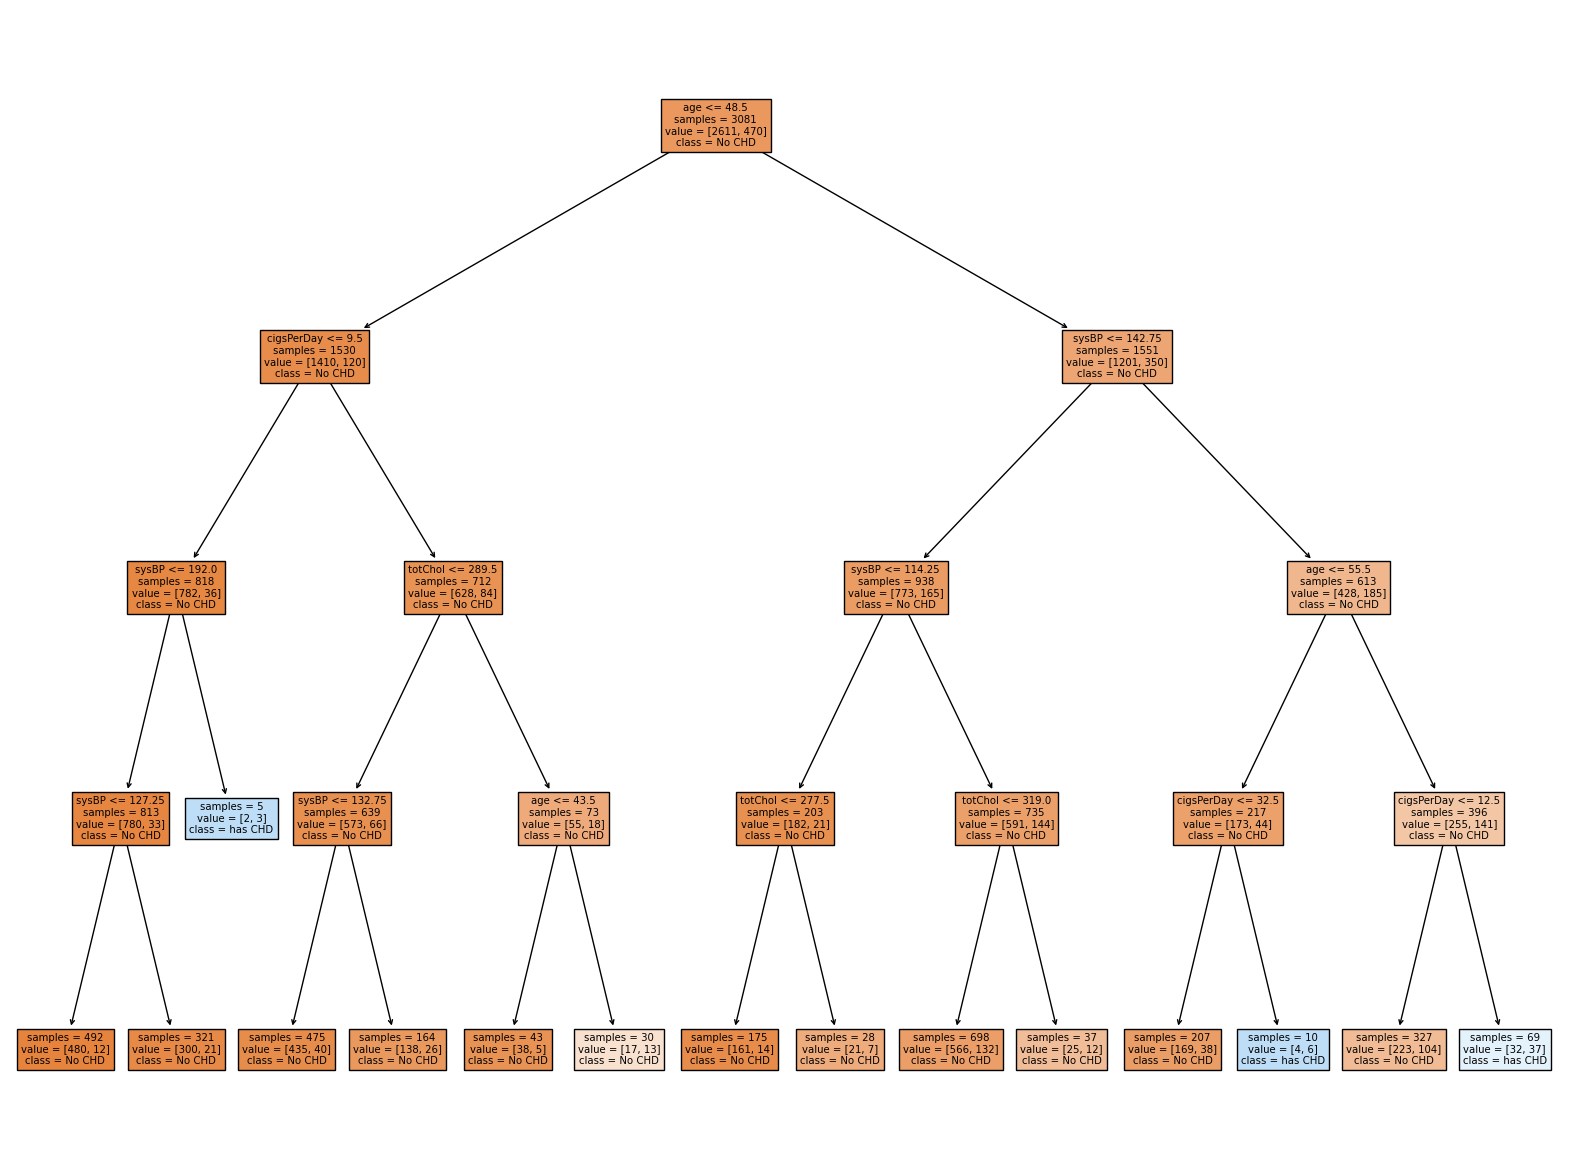

Accuracy: 0.8570038910505836


In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

#variables chosen to dtermine the relationship between numeric and cat variables
selected_features = ['age', 'currentSmoker', 'cigsPerDay', 'totChol', 'sysBP']
target_variable = 'TenYearCHD'

# filter dataset to include only selected features and target variable
trainData = df_train[selected_features + [target_variable]]
testData = df_test[selected_features + [target_variable]]

# process data, dropped values that were NA so data can be processed
trainData.dropna(inplace=True)
testData.dropna(inplace=True)

# split training and testing data into features (X) and target variable (y)
X_train = trainData[selected_features]
y_train= trainData[target_variable]
X_test = testData[selected_features]
y_test= testData[target_variable]

#decision tree model
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5,random_state=42)
clf.fit(X_train , y_train)
var_names = clf.feature_names_in_
plt.figure(figsize=(20, 15))#adjusts size to make larger
plot_tree(clf,filled=True,feature_names=var_names, class_names=['No CHD', 'has CHD'], impurity=False) #classifies decision with yes or no for CHD
plt.show()

y_pred = clf.predict(X_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Our group aimed to build a decision tree model using selected variables like age, current smoker status, cigarettes smoked per day (cigsPerDay), total cholesterol (totChol), and systolic blood pressure (sysBP) to predict whether someone has coronary heart disease (CHD) or not. These variables are known risk factors or indicators for CHD. Age is a well-established risk factor, smoking is strongly associated with increased CHD risk, and elevated levels of total cholesterol and systolic blood pressure are also significant predictors of CHD. By combining categorical and numerical data, we sought to create a model with real-life applicability, where parameters can be tuned to improve performance, and insights can be gained into how different variables contribute to CHD risk.

The decision tree model, particularly for systolic blood pressure (sysBP), achieved an accuracy of 0.857 after adjusting various parameters such as max depth and minimum sample size. The model revealed intriguing insights, such as individuals below the age of 48 who smoke less than 9 cigarettes per day but have a systolic blood pressure above 192 may still be at risk for CHD. Similarly, individuals above the age of 55 with high systolic blood pressure and a smoking habit of more than 12 cigarettes per day are also identified as at-risk.

However, the model does have some limitations. It appears to create overly complex decision rules based on rare combinations of features present only in the training data, which may hinder its generalizability to new patients. Additionally, the model may struggle to capture the imbalance in CHD risk, as it may be biased towards predicting the majority class. This could result in the overlooking of important patterns related to CHD risk in the minority class, leading to suboptimal performance in predicting CHD risk.

<ipython-input-123-787e8e8041e0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData.dropna(inplace=True)
<ipython-input-123-787e8e8041e0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData.dropna(inplace=True)


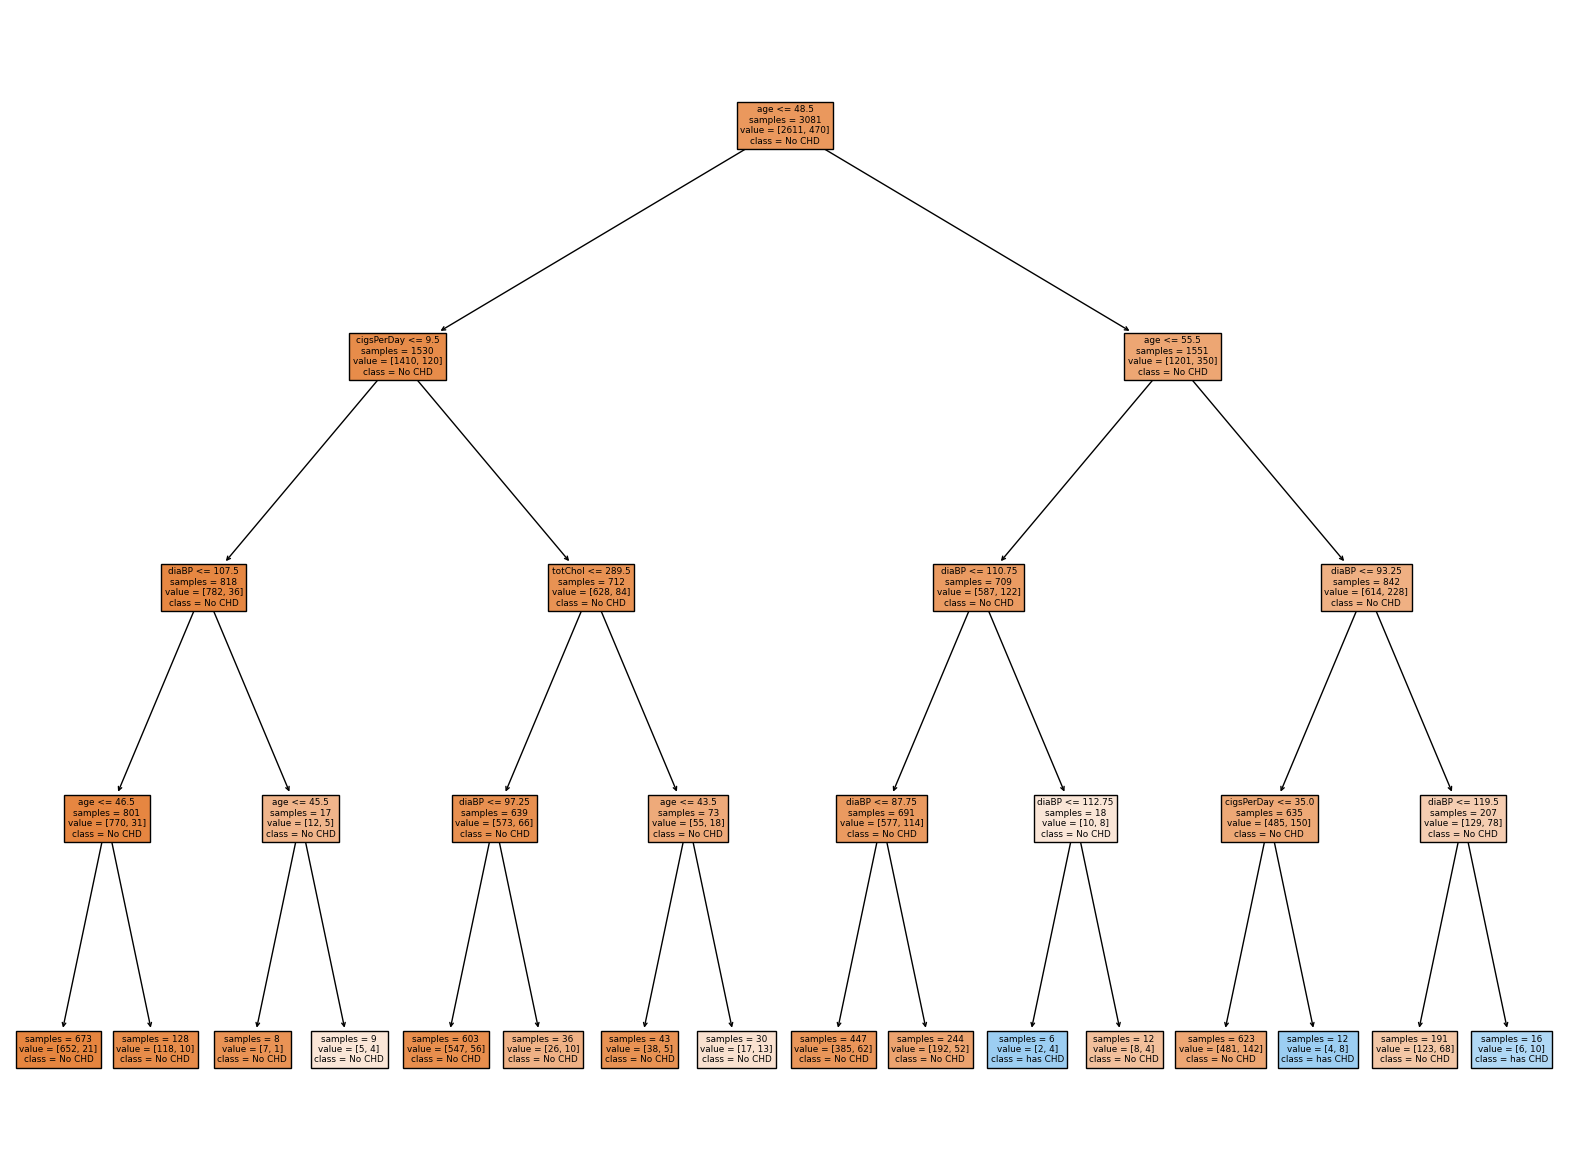

Accuracy: 0.8501945525291829


In [123]:
selected_features = ['age', 'currentSmoker', 'cigsPerDay', 'totChol', 'diaBP'] #variables chosen to dtermine the relationship between numeric and cat variables
target_variable = 'TenYearCHD'

# filter dataset to include only selected features and target variable
trainData = df_train[selected_features + [target_variable]]
testData = df_test[selected_features + [target_variable]]

# process data, dropped values that were NA so data can be processed
trainData.dropna(inplace=True)
testData.dropna(inplace=True)

# split training and testing data into features (X) and target variable (y)
X_train = trainData[selected_features]
y_train= trainData[target_variable]
X_test = testData[selected_features]
y_test= testData[target_variable]

#decision tree model
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5,random_state=42)
clf.fit(X_train , y_train)
var_names = clf.feature_names_in_
plt.figure(figsize=(20, 15))#adjusts size to make larger
plot_tree(clf,filled=True,feature_names=var_names, class_names=['No CHD', 'has CHD'], impurity=False) #classifies decision with yes or no for CHD
plt.show()

y_pred = clf.predict(X_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In further analyzing the effects of blood pressure, this decision tree replaces systolic blood pressure data with diastolic blood pressure data. We anticipate that when building a predictive model for CHD, including both systolic and diastolic blood pressure as separate features may provide a more comprehensive understanding of cardiovascular risk. Analyzing the relationship between diastolic bloop pressure and CHD risk alongside other relevant variables such as age, cholesterol levels, smoking status, and family history of heart disease can help identify individuals at higher risk and guide preventive measures and treatment strategies.

The model achieved an accuracy of 0.85. It shows that individuals above the age of 55 with diastolic blood pressure higher than 119.5, those with a lower diastolic pressure but who smoke more than 35 cigarettes per day, and those with a blood pressure between 110-112 are predicted to have a risk of CHD.

When comparing the use of systolic versus diastolic blood pressure in the models, it's important to note that systolic blood pressure represents the pressure in the arteries when the heart beats, while diastolic blood pressure represents the pressure when the heart is at rest between beats. Both measures are important indicators of cardiovascular health and can provide valuable insights into CHD risk. By including both systolic and diastolic blood pressure as separate features in the model, we can capture different aspects of blood pressure dynamics and potentially improve the accuracy of CHD risk prediction.

*K-Nearest Neighbors Model*

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#Load in the training and testing data again
df_train = pd.read_csv('/content/project_chd/fhs_train.csv')
df_test = pd.read_csv('/content/project_chd/fhs_test.csv')

#Dropping columns that we won't be using from both the training and testing datasets
columns_to_drop = ['age','sex', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',	'prevalentStroke',	'prevalentHyp',	'diabetes',	'sysBP',	'diaBP',	'BMI',	'glucose'	 ]
df_train = df_train.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)

#Dropping any rows with missing data in both datasets
df_train = df_train.dropna()
df_test = df_test.dropna()

In [125]:
#Created a maxmin function to calculate maxmin normalizations to scale the data for heartRate and totChol data in both datasets
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

df_train['totChol'] = maxmin(df_train['totChol'])
df_train['heartRate'] = maxmin(df_train['heartRate'])
df_test['totChol'] = maxmin(df_test['totChol'])
df_test['heartRate'] = maxmin(df_test['heartRate'])

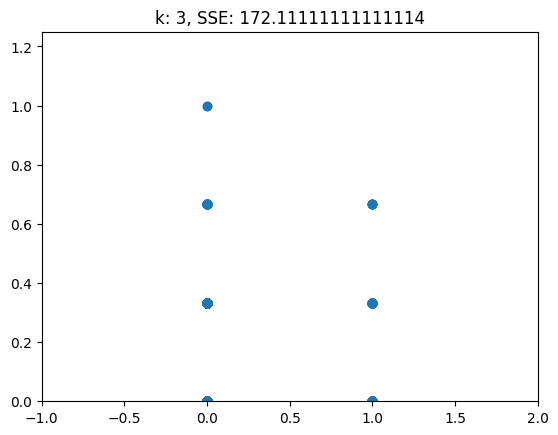

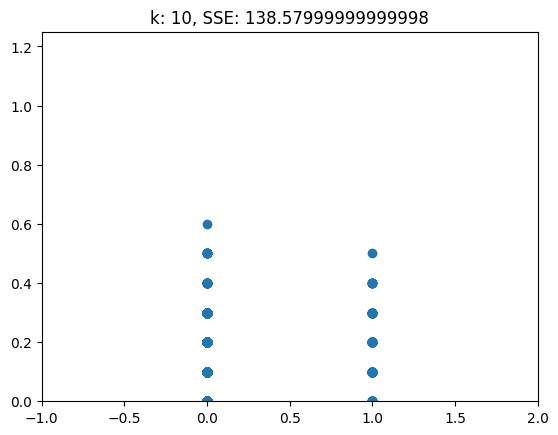

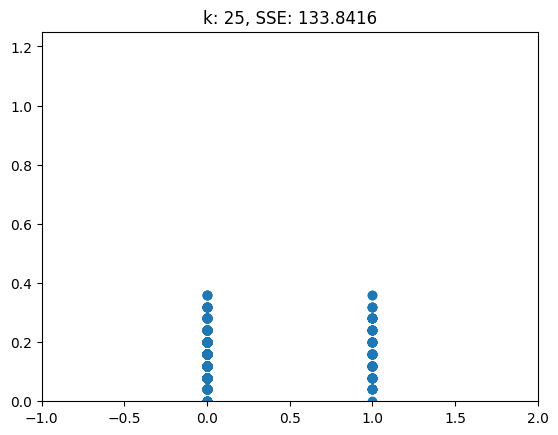

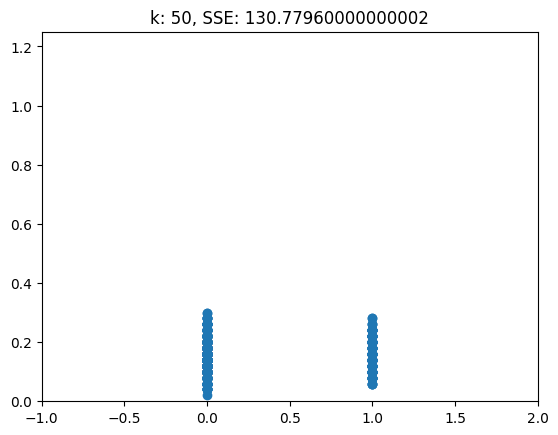

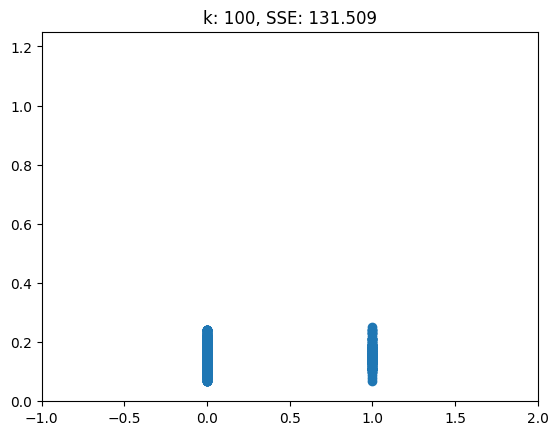

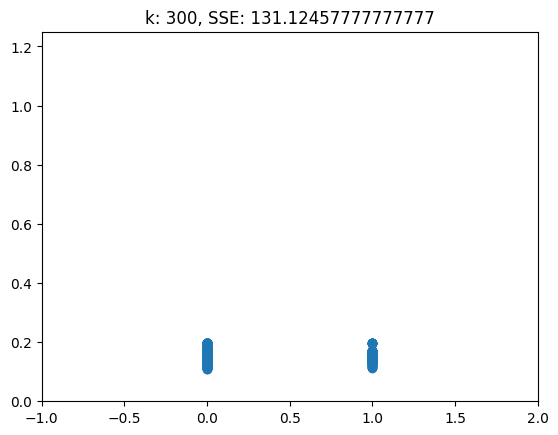

In [126]:
#Extracting the target variable 'TenYearCHD' to compare it to the other variables in the datasets
y_train = df_train['TenYearCHD']
X_train = df_train.drop('TenYearCHD',axis=1)
y_test = df_test['TenYearCHD']
X_test = df_test.drop('TenYearCHD',axis=1)

#Training KNN for different values of k and calculating the sum of squares of each to find the optimal k
for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_hat = model.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    axes.set_ylim(0,1.25)
    axes.set_xlim(-1, 2)
    plt.show()

With K-Nearest Neighbors, we specifically looked at variables like heart rate ('heartRate') and total cholesterol ('totChol') to predict the risk of coronary heart diseases based on comparing an individual's data against a training dataset of individuals who have previously been diagnosed with being at risk or not at risk of CHD. First, we had to test various values of k ranging from 1 to 300 to determine what the optimal value was to minimize any underfitting or overfitting in our data, which we chose by selecting the k value that produced the minimum sum of squared errors (SSE) between predicted and actual results from our training and testing datasets. Looking at the graphs above, we can see that the optimal k value is somewhere around 50 because the graph for this k value produced the smallest SSE value of 130.77. This gives us a rough estimate of what our optimal k value is.

[68]


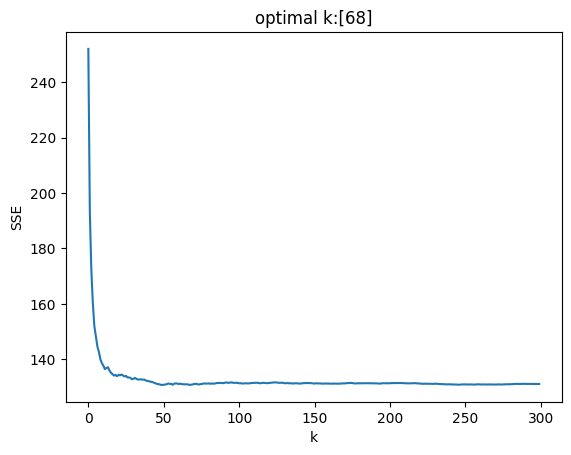

In [127]:
#Determine the optimal k by finding the k that minimizes SSE
k_bar = 300
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )
SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

#Fit the model with the optimal k found and make predictions
model_optimal = KNeighborsRegressor(n_neighbors=k_star[0]).fit(X_train, y_train)
y_hat_optimal = model_optimal.predict(X_test)

#Plotting the SSE by k to find the optimal k
plt.plot(np.arange(0,k_bar),SSE)
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('SSE')
plt.show()

Since we determined our k optimal value is about 50, we can precisely find what our optimal value is by testing every k value in our original range of 1 through 300 and calculating the SSE between predicted and actual results from our fitted model to find the true minimum value rather than just a rough estimate. We then generated a plot to visualize the SSE across all the k values to see which k value had the minimum SSE value. This produced an optimal k value of 68 which means that minimizes error and allows us to have a model that is robust and well-tuned for the given data and has minimal overfitting and underfitting. Now using this optimal k value, we can train a new KNN model to make predictions that are more accurate. Comparing this plot to the plot above, this one gives us a more accurate understanding of what our optimal k value is because rather than using guess and check to find what k value it roughly is, this plot looks at every possibility of k to determine what the optimal k value is. Though this plot is a lot more complex than the plot above, if it leads to a more accurate k value it is a perfectly reasonable trade-off where accuracy and complexity is preferred over estimation and simplicity.

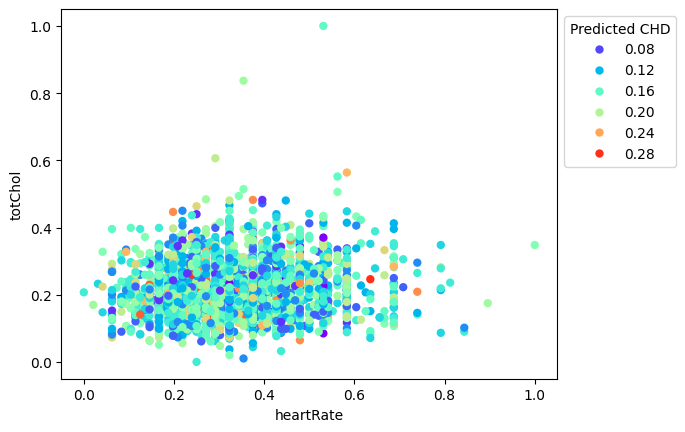

In [128]:
#Creating a new dataframe to show predicted CHD based on normalized heart rate and cholesterol
x_hat = pd.DataFrame({'heartRate':X_train['heartRate'],'totChol':X_train['totChol']})
y_hat_train = model_optimal.predict(X_train)
x_hat['Predicted CHD'] = y_hat_train

#Plotting the predictions to see the relationship between heart rate, cholesterol, and predicted CHD
this_plot = sns.scatterplot(data=x_hat,x='heartRate',y='totChol',
                            hue='Predicted CHD', palette = 'rainbow', linewidth=0)
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

To determine whether our fitted model's predictions make intuitive sense, we created a plot to show the relationship between heart rate and total cholesterol and their influence on the predicted risk of CHD according to the KNN fitted model. To do this, we had to create a new dataframe with the normalized values of heart rate and total cholesterol from the training data and added a new column with predicted CHD that we gathered from the model's predictions of the CHD outcomes based on the training dataset. With this new dataframe, we created a scatterplot that shows the relationships between heart rate, total cholesterol, and predicted CHD risk and how changes in heart rate and cholesterol levels are associated with changes in the predicted risk of CHD. Intuitively, knowing that higher levels of cholesterol and specific heart rates are typically correlated with an increased risk of CHD, we were looking to see if this correlation was evident in the graph. Looking at the graph, we can see the higher risks of CHD are pretty scattered throughout but many do cluster around higher cholesterol levels which may indicate that higher cholesterol levels possibly in combination with certain heart rate levels could be associated with an increased risk of CHD as seen by the predicted model. However, because this correlation is only seen in a few instances, it may suggest that these variables have a weak influence on CHD or that other variables that were not used in the predicted models might be factoring in here.

In [133]:
#Creating a confusion matrix to evaluate the model's predictions with the test data versus the actual results
knn = KNeighborsClassifier(n_neighbors=68)
predictor = knn.fit(X_train.values, y_train)
y_hat = predictor.predict(X_test.values)
accuracy = knn.score(X_test.values, y_test)
print('Accuracy: ', accuracy)
pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted'])

Accuracy:  0.8540076335877863


Predicted,0
Actual,
0,895
1,153


To see the fitted model's overall predictive accuracy, we created a confusion matrix that shows the breakdown of true positives, false positives, true negatives, and false negatives. We first trained the training data and used the model to predict the outcomes on the test dataset. Then, to calculate the accuracy of the model, we scored the model to find the proportion of correct predictions out of all the prediction made on the test dataset and created a confusion model that shows the actual outcomes versus the predicted outcomes. This produced an accuracy of 0.854, meaning that it has an accuracy of 85%. This seems good at first glance, however when looking at the confusion matrix, we can see that it did not produce any cases where the individual was at risk of CHD with the value 1. This means that though it was able to identify the negative cases (cases classified as 0) it was not able to identify any positive cases (cases classified as 1). This is probably because looking at the test and train data, there was an imbalance of cases, meaning that significantly more cases had a CHD of 0 compared to those that had a CHD of 1. Thus, the models were unable to accurately recognize and predict any patterns with cases where the individual was at risk of coronary heart disease. Additionally, this KNN model is only looking two variables, heartRate and totChol which further shows how the accuracy is misleading. As we saw with the plot above which compares the relationship between heart rate, cholesterol, and predicted CHD, we can see that heartRate and totChol do not particularly have a strong influence on CHD, meaning that there are other factors that could potentially be influencing these results and may be more influential on predicting coronary heart disease. So, since this model is not considering other factors such as age, their smoking status, use of BP meds, and so forth there could be flaws in its predictive modeling.
